# TP 1 - Séance II
## Analyse de signaux 1D

In [2]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice IV (7 points)
## FFT d'un signal théorique

Soient les trois signaux suivant:
$$Y_1(t)=7\cos(2\pi\times6t)$$
$$Y_2(t)=4\cos(2\pi\times15t + \frac{3\pi}{2})$$
$$Y_3(t)=-3\cos(2\pi\times30t)$$

**1.** Donnez l'amplitude, la fréquence et la phase de chacun de ces signaux.

| Signal | Fréquence | Amplitude | Phase |
|--------|-----------|-----------|-------|
| y1(t)  |     6     |     7     |   0   |
| y2(t)  |     15    |     4     | -3pi/2|
| y3(t)  |     30    |     3     |   0   |



Ces signaux sont échantillonés à la fréquence $F_e = 120 \text{ Hz}$ pour $0 \leq t \leq 1$.

**2.** Affichez les trois signaux superposés sur un même graphe.

In [19]:
print(-3*np.pi/(2))

-4.71238898038469


In [3]:
# Attention! np.linspace(0, 1, Fe) ne donne pas une fréquence d'échantillonage de 1/Fe mais de 1/(Fe-1).
# Utilisez plutôt np.arange.

C:\Users\mihbs\AppData\Local\Temp/ipykernel_17632/2796937241.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


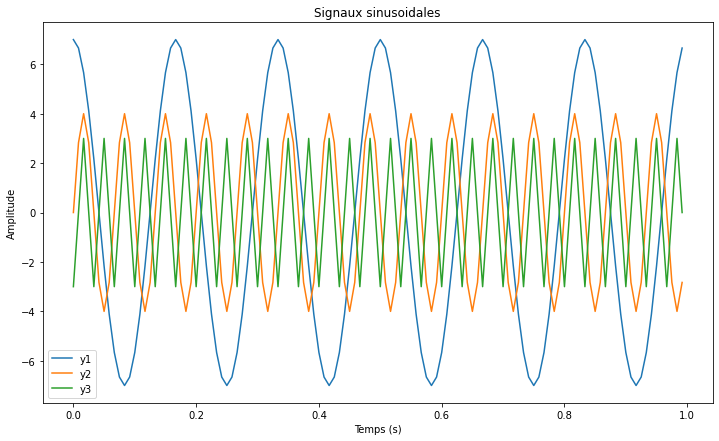

In [9]:
freq = 120
t = np.arange(0, 1, 1/freq)

y1 = 7*np.cos(2*np.pi*6*t)
y2 = 4*np.cos(2*np.pi*15*t + 3*np.pi/2)
y3 = -3*np.cos(2*np.pi*30*t)


fig, ax = plt.subplots()
ax.plot(t, y1)
ax.plot(t, y2)
ax.plot(t, y3)

ax.legend(['y1', 'y2', 'y3'])
ax.set_title('Signaux sinusoidales')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Amplitude')
fig.show()

**3.** Affichez la somme des signaux $S(t)=Y_1(t)+Y_2(t)+Y_3(t)$. Déterminez graphiquement la période du signal S.

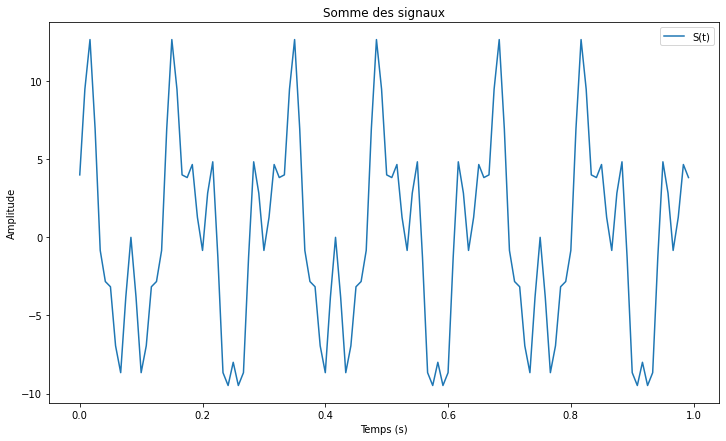

La période est de  0.3333333333333333 secondes


In [12]:
from scipy.signal import find_peaks

somme = y1 + y2 + y3
fig, ax = plt.subplots()
ax.plot(t, somme)

peaks = find_peaks(somme, height=10)
index = t[peaks[0]]
period = (index[2]-index[0])

#major_ticks = np.arange(0, 1, 0.05)
#ax.set_xticks(major_ticks)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)
#ax.grid(which='both')
#ax.grid(which='major', alpha=0.5)

ax.legend(['S(t)'])
ax.set_title('Somme des signaux')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Amplitude')

plt.show()

print("La période est de ", period, "secondes")

**4.** Affichez le module et la phase de la FFT des signaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$ entre 0 et 60Hz.
Vérifiez que l'amplitude, la fréquence et la phase des signaux correspondent bien aux valeurs attendues.

(Vous pouvez encapsuler le code de calcul et d'affichage de la fft dans une fonction.)

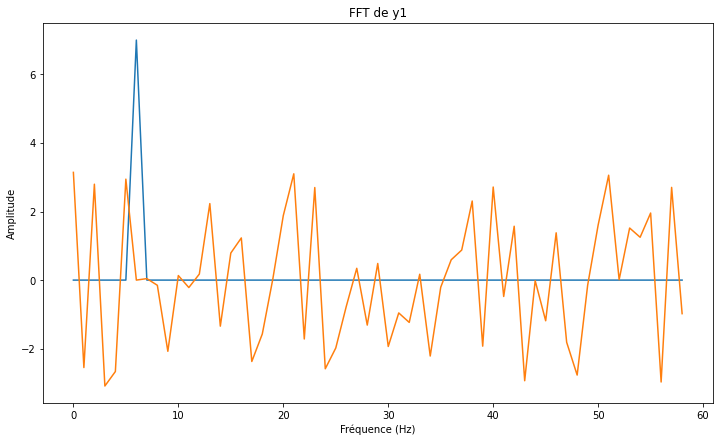

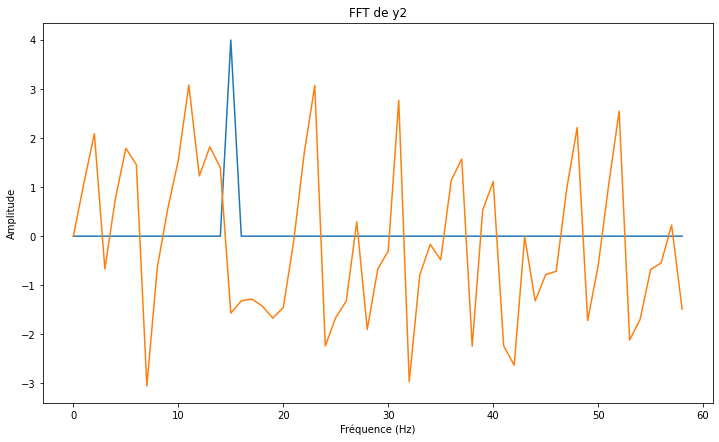

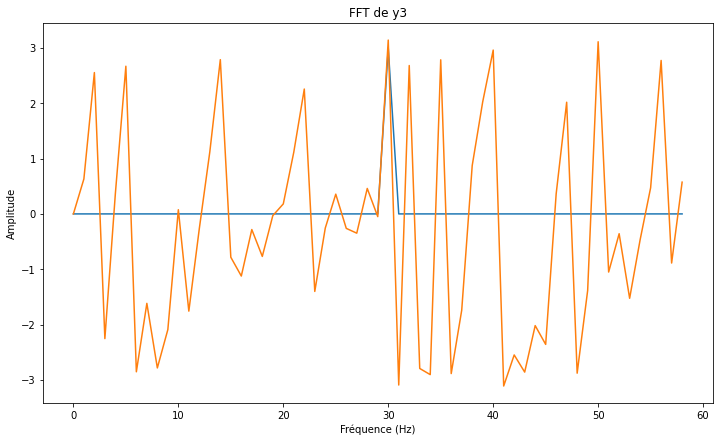

Pour tous les FFT, les amplitudes obtenues correspondent aux valeurs attendues



In [28]:
# La fft se calcule avec:  y = fft(Y) / len(Y). 
# Les raies calculées correspondent aux fréquences comprises entre 0 (incluse) et Fe (exclue) avec un pas de Fe/len(Y).
# Leur module est donné par: np.abs(y) et leur phase (en radians) par: np.angle(y)

Fe = 120 #Hz
freq = np.arange(0, Fe, Fe/len(y1))

fft1 = np.fft.fft(y1)/len(y1)  
amplitude1 = np.abs(fft1)*2
phase1 = np.angle(fft1)


fig, ax1 = plt.subplots()
ax1.plot(freq[0:59], amplitude1[0:59])
ax1.plot(freq[0:59], phase1[0:59])
ax1.set_title('FFT de y1')
ax1.set_xlabel('Fréquence (Hz)')
ax1.set_ylabel('Amplitude')
plt.show()


fft2 = np.fft.fft(y2)/len(y2)
amplitude2 = np.abs(fft2)*2
phase2 = np.angle(fft2)

fig, ax2 = plt.subplots()
ax2.plot(freq[0:59], amplitude2[0:59])
ax2.plot(freq[0:59], phase2[0:59])
ax2.set_title('FFT de y2')
ax2.set_xlabel('Fréquence (Hz)')
ax2.set_ylabel('Amplitude')
plt.show()


fft3 = np.fft.fft(y3)/len(y3)
amplitude3 = np.abs(fft3)*2
phase3 = np.angle(fft3)

fig, ax3 = plt.subplots()
plt.plot(freq[0:59], amplitude3[0:59])
plt.plot(freq[0:59], phase3[0:59])
ax3.set_title('FFT de y3')
ax3.set_xlabel('Fréquence (Hz)')
ax3.set_ylabel('Amplitude')
plt.show()

print("Pour tous les FFT, les amplitudes obtenues correspondent aux valeurs attendues")
print("")

**5.** De la même manière affichez le spectre de $S$. Quelle propriété de la transformée de Fourier est mise en évidence par cette expérience?

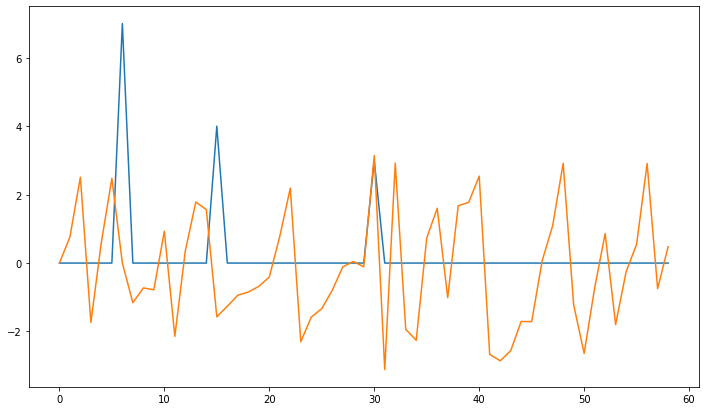

In [29]:
## afficher FFT de S

freq = np.arange(0, Fe, Fe/len(somme))

fftsomme = np.fft.fft(somme)/len(somme)  # pk divise par len(y1) ??
amplitudesomme = np.abs(fftsomme)*2
phasesomme = np.angle(fftsomme)

fig, axsomme = plt.subplots()
axsomme.plot(freq[0:59], amplitudesomme[0:59])
axsomme.plot(freq[0:59], phasesomme[0:59])
ax3.set_title('FFT de la somme des signaux')
ax3.set_xlabel('Fréquence (Hz)')
ax3.set_ylabel('Amplitude')
plt.show()


L'extensivité (propriété d'addition) de la transformée de Fourier est mise en évidence. 

**6.** Pourquoi est-ce pertinent de tracer le spectre entre 0 et 60Hz plutôt qu'entre 0 et 120Hz?

Comme c'est un signal périodique cosinus, on sait que la réponse impulsionnelle est deux diracs symétrique à - fréquence et + fréquence sur une période de 120Hz. Ainsi, on peut juste avoir une impulsion et connaître où est la seconde impulsion. 

**7.** Si on retardait $Y_1(t)$ d'un quart de seconde de sorte que $Y_1'(t)=Y_1(t+\frac{1}{4})$, comment évoluerait le module du spectre? Même question pour sa phase (à la fréquence du signal)?

$$Y_1'(t)=7\cos(2\pi\times6(t-\frac{1}{4}))$$

Le retard n'affecte pas l'amplitude.
La phase est cependant modifiée. Le shift est de 6/4 = 3/2 rad. 



On échantillone maintenant ces signaux avec une fréquence d'échantillonage $F_{e2}=40$ Hz.

**8.** Tracez à nouveau $S$ en temporel en le superposant au signal échantilloné à 120Hz affiché en pointillé.

Tracez le module du nouveau spectre de S entre 0 et $F_{e2}=40$ Hz.

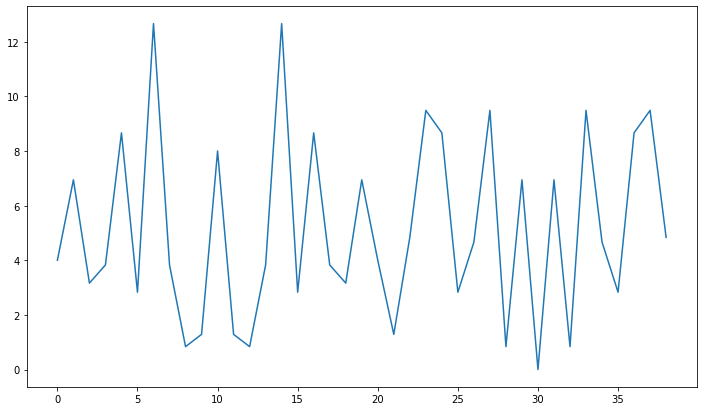

In [26]:
Fe2 = 40
freq2 = np.arange(0, Fe2, Fe2/len(somme))

t2 = np.arange(0, 1, 1/40)

y12 = 7*np.cos(2*np.pi*6*t2)
y22 = 4*np.cos(2*np.pi*15*t2 + 3*np.pi/2)
y32 = -3*np.cos(2*np.pi*30*t2)

somme2 = y12 + y22 + y32

fftS2 = np.fft.fft(somme2)/len(somme2)
amplitudeS2 = np.abs(somme2)
phaseS2 = np.angle(somme2)

plt.plot(freq[0:39], amplitudeS2[0:39])
plt.show()

**9.** En étudiant le nouveau spectre, lequel des 3 signaux a été altéré par le sous-échantillonage? Pourquoi?

Le 3e signal car sa fréquence est de 30Hz. La fréquence de Nyquist est de 2 * fréquence d'échantillonnage. Alors, il est impossible de bien distinguer le signal.

**10.** Quelle est la fréquence d'échantillonage minimale pour assurer une bonne mesure de ces signaux?

La fréquence d'échantillonnage minimale est de 30 * 2 = 60 Hz pour avoir une bonne mesure des trois signaux.